# Agglomerative Clustering

Agglomerative Clustering is a hierarchical clustering algorithm used for grouping similar data points into clusters. It is a bottom-up approach, where each data point starts as its own cluster and then iteratively merges clusters based on their similarity until a desired number of clusters is reached.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

titles = pd.read_csv('../../preprocessing/titles_preprocessed.csv')

In [2]:
titles

,id,title,type,description,release_year,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity
0,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],0.0,tt0017925,8.200000,89766.000000,8.647
1,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,92,"['comedy', 'drama', 'romance']",['US'],0.0,tt0032599,7.800000,57835.000000,11.270
2,tm19424,Detour,MOVIE,"The life of Al Roberts, a pianist in a New Yor...",1945,66,"['thriller', 'drama', 'crime']",['US'],0.0,tt0037638,7.300000,17233.000000,7.757
3,tm112005,Marihuana,MOVIE,A young girl named Burma attends a beach party...,1936,57,"['crime', 'drama']",['US'],0.0,tt0026683,4.000000,864.000000,3.748
4,tm22806,Intolerance: Love's Struggle Throughout the Ages,MOVIE,"The story of a poor young woman, separated by ...",1916,197,"['history', 'drama']",['US'],0.0,tt0006864,7.700000,15242.000000,9.412
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2652,tm975981,Cher & the Loneliest Elephant,MOVIE,"""The World's Loneliest Elephant"" Kaavan will f...",2021,46,['documentation'],"['KH', 'PK', 'GB', 'US']",0.0,tt14303400,7.600000,237.000000,1.758
2653,ts296262,Searching for Secrets,SHOW,Journey back in time to uncover buried tales i...,2021,44,['documentation'],"['GB', 'US']",1.0,tt18259488,6.046369,22272.758145,0.600
2654,tm1106415,Destination Porto: The Unimaginable Journey,MOVIE,Follow soccer journalist Guillem Belagué as he...,2021,85,['documentation'],[],0.0,tt15430722,7.700000,8.000000,0.600
2655,ts305329,House Calls with Dr. Phil,SHOW,The talk show legend travels across the countr...,2021,43,['reality'],['US'],1.0,tt15176234,5.400000,35.000000,0.600


## Preprocessing

In [3]:
# First, we're going to take a look at what the "genres" attribute look like.

genres = titles['genres']
genres_split = genres.str.split(',')
    
i = 0    
for genre_list in genres_split:
    print(genre_list)
    i+=1
    if i==5:
        break

["['action'", " 'drama'", " 'war'", " 'western'", " 'comedy'", " 'european']"]
["['comedy'", " 'drama'", " 'romance']"]
["['thriller'", " 'drama'", " 'crime']"]
["['crime'", " 'drama']"]
["['history'", " 'drama']"]


In [4]:
# This is not very convenient for us to work with. 
# https://www.kaggle.com/code/thomaslazarus/streaming-service-data-analysis - this code had a good idea on what to do in this 
# scenario, so I copied their idea.

titles["genres"] = titles.apply(lambda row: row["genres"].replace('[', '').replace(']', '').replace("'", "").split(", "), axis=1)
genre_df = pd.DataFrame(titles.genres.values.tolist(), titles.index).add_prefix('genre_')
genre_df.head()

,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8
0,action,drama,war,western,comedy,european,None,None,None
1,comedy,drama,romance,None,None,None,None,None,None
2,thriller,drama,crime,None,None,None,None,None,None
3,crime,drama,None,None,None,None,None,None,None
4,history,drama,None,None,None,None,None,None,None


In [5]:
titles = (titles.join(genre_df).drop(columns=["genres"]))
titles.head()

,id,title,type,description,release_year,runtime,production_countries,seasons,imdb_id,imdb_score,...,tmdb_popularity,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8
0,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,78,['US'],0.0,tt0017925,8.2,...,8.647,action,drama,war,western,comedy,european,None,None,None
1,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,92,['US'],0.0,tt0032599,7.8,...,11.270,comedy,drama,romance,None,None,None,None,None,None
2,tm19424,Detour,MOVIE,"The life of Al Roberts, a pianist in a New Yor...",1945,66,['US'],0.0,tt0037638,7.3,...,7.757,thriller,drama,crime,None,None,None,None,None,None
3,tm112005,Marihuana,MOVIE,A young girl named Burma attends a beach party...,1936,57,['US'],0.0,tt0026683,4.0,...,3.748,crime,drama,None,None,None,None,None,None,None
4,tm22806,Intolerance: Love's Struggle Throughout the Ages,MOVIE,"The story of a poor young woman, separated by ...",1916,197,['US'],0.0,tt0006864,7.7,...,9.412,history,drama,None,None,None,None,None,None,None


In [6]:
# We can just focus on the top genre - usually, that should be enough to describe a movie

titles = titles.drop(columns=["genre_1", "genre_2", "genre_3", "genre_4", "genre_5", "genre_6", "genre_7", "genre_8"])
        
# Cleaning up the rest of the data 

titles.dropna(subset=['genre_0'], inplace=True)
titles.rename(columns={'genre_0': 'genre'}, inplace=True)

In [7]:
titles.head()

,id,title,type,description,release_year,runtime,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,genre
0,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,78,['US'],0.0,tt0017925,8.2,89766.0,8.647,action
1,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,92,['US'],0.0,tt0032599,7.8,57835.0,11.270,comedy
2,tm19424,Detour,MOVIE,"The life of Al Roberts, a pianist in a New Yor...",1945,66,['US'],0.0,tt0037638,7.3,17233.0,7.757,thriller
3,tm112005,Marihuana,MOVIE,A young girl named Burma attends a beach party...,1936,57,['US'],0.0,tt0026683,4.0,864.0,3.748,crime
4,tm22806,Intolerance: Love's Struggle Throughout the Ages,MOVIE,"The story of a poor young woman, separated by ...",1916,197,['US'],0.0,tt0006864,7.7,15242.0,9.412,history


In [8]:
# Creating the score bins

# IMDB score bins (0-5.5 - Low, 5.5-6.6 - Medium, 6.6-10 - High)
bins = [0, 5.5, 6.6, 10]
# Class labels
labels = ['Low-Rated', 'Medium-Rated', 'High-Rated']  

# Bin the IMDb scores into different ranges and assign labels
titles['imdb_score_bin'] = pd.cut(titles['imdb_score'], bins=bins, labels=labels)

titles.head()

,id,title,type,description,release_year,runtime,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,genre,imdb_score_bin
0,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,78,['US'],0.0,tt0017925,8.2,89766.0,8.647,action,High-Rated
1,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,92,['US'],0.0,tt0032599,7.8,57835.0,11.270,comedy,High-Rated
2,tm19424,Detour,MOVIE,"The life of Al Roberts, a pianist in a New Yor...",1945,66,['US'],0.0,tt0037638,7.3,17233.0,7.757,thriller,High-Rated
3,tm112005,Marihuana,MOVIE,A young girl named Burma attends a beach party...,1936,57,['US'],0.0,tt0026683,4.0,864.0,3.748,crime,Low-Rated
4,tm22806,Intolerance: Love's Struggle Throughout the Ages,MOVIE,"The story of a poor young woman, separated by ...",1916,197,['US'],0.0,tt0006864,7.7,15242.0,9.412,history,High-Rated


In [ ]:
titles = titles.drop(columns=["production_countries", "imdb_votes", "tmdb_popularity"])

In [9]:
# Turning the type and genre into a categorical attributes
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(titles['type'])
titles['encoded_type'] = label_encoder.transform(titles['type'])

label_encoder.fit(titles['genre'])
titles['encoded_genre'] = label_encoder.transform(titles['genre'])

titles.head()

,id,title,type,description,release_year,runtime,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,genre,imdb_score_bin,encoded_type,encoded_genre
0,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,78,['US'],0.0,tt0017925,8.2,89766.0,8.647,action,High-Rated,0,1
1,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,92,['US'],0.0,tt0032599,7.8,57835.0,11.270,comedy,High-Rated,0,3
2,tm19424,Detour,MOVIE,"The life of Al Roberts, a pianist in a New Yor...",1945,66,['US'],0.0,tt0037638,7.3,17233.0,7.757,thriller,High-Rated,0,16
3,tm112005,Marihuana,MOVIE,A young girl named Burma attends a beach party...,1936,57,['US'],0.0,tt0026683,4.0,864.0,3.748,crime,Low-Rated,0,4
4,tm22806,Intolerance: Love's Struggle Throughout the Ages,MOVIE,"The story of a poor young woman, separated by ...",1916,197,['US'],0.0,tt0006864,7.7,15242.0,9.412,history,High-Rated,0,9


In [10]:
features = titles[['runtime', 'release_year', 'seasons', 'encoded_type', 'encoded_genre']].values

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

In [12]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3, linkage='single', compute_distances=True)
model.fit(features)

AgglomerativeClustering(compute_distances=True, linkage='single', n_clusters=3)

In [13]:
titles[model.labels_ == 0].head()

,id,title,type,description,release_year,runtime,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,genre,imdb_score_bin,encoded_type,encoded_genre
538,ts22109,The Twilight Zone,SHOW,A series of unrelated stories containing drama...,1959,28,['US'],5.0,tt0052520,9.1,80605.0,29.897,scifi,High-Rated,1,14
539,ts21236,Star Trek,SHOW,Star Trek is an American science fiction telev...,1966,50,['US'],3.0,tt0060028,8.4,81281.0,123.805,scifi,High-Rated,1,14
543,ts20005,I Love Lucy,SHOW,Cuban Bandleader Ricky Ricardo would be happy ...,1951,30,['US'],9.0,tt0043208,8.5,25944.0,17.088,comedy,High-Rated,1,3
545,ts21682,Happy Days,SHOW,In 1950s Milwaukee the Cunningham family must ...,1974,24,['US'],11.0,tt0070992,7.3,32.0,19.994,comedy,High-Rated,1,3
547,ts22170,Gunsmoke,SHOW,Gunsmoke is an American radio and television W...,1955,49,['US'],20.0,tt0047736,8.0,6859.0,24.361,action,High-Rated,1,1


In [14]:
titles[model.labels_ == 1].head()

,id,title,type,description,release_year,runtime,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,genre,imdb_score_bin,encoded_type,encoded_genre
98,tm134133,Tarzan the Fearless,MOVIE,"Mary Brooks' father, who has been studying anc...",1933,228,['US'],0.0,tt0024645,4.9,711.0,1.795,action,Low-Rated,0,1


In [15]:
titles[model.labels_ == 2].head()

,id,title,type,description,release_year,runtime,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,genre,imdb_score_bin,encoded_type,encoded_genre
0,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,78,['US'],0.0,tt0017925,8.2,89766.0,8.647,action,High-Rated,0,1
1,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,92,['US'],0.0,tt0032599,7.8,57835.0,11.270,comedy,High-Rated,0,3
2,tm19424,Detour,MOVIE,"The life of Al Roberts, a pianist in a New Yor...",1945,66,['US'],0.0,tt0037638,7.3,17233.0,7.757,thriller,High-Rated,0,16
3,tm112005,Marihuana,MOVIE,A young girl named Burma attends a beach party...,1936,57,['US'],0.0,tt0026683,4.0,864.0,3.748,crime,Low-Rated,0,4
4,tm22806,Intolerance: Love's Struggle Throughout the Ages,MOVIE,"The story of a poor young woman, separated by ...",1916,197,['US'],0.0,tt0006864,7.7,15242.0,9.412,history,High-Rated,0,9


In [16]:
print(titles[titles["imdb_score_bin"] == "Low-Rated" ].shape)
print(titles[titles["imdb_score_bin"] == "Medium-Rated" ].shape)
print(titles[titles["imdb_score_bin"] == "High-Rated" ].shape)

(882, 16)
(914, 16)
(861, 16)


Text(0.5, 1.0, 'Cluster 3')

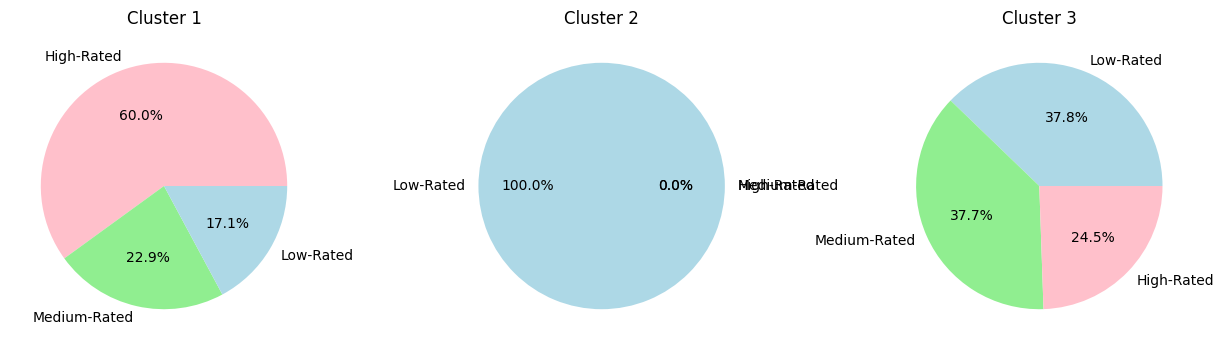

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

titles0 = titles[model.labels_== 0]
titles1 = titles[model.labels_== 1]
titles2 = titles[model.labels_== 2]

attribute_counts = titles0['imdb_score_bin'].value_counts()

# Extract attribute labels and their frequencies
labels = attribute_counts.index.tolist()
frequencies = attribute_counts.values.tolist()
colors = ['pink', 'lightgreen', 'lightblue']  # Specify colors for each label


axs[0].pie(frequencies, labels=labels, autopct='%1.1f%%', colors=colors)
axs[0].set_title("Cluster 1")


# Extract attribute labels and their frequencies
attribute_counts = titles1['imdb_score_bin'].value_counts()
labels = attribute_counts.index.tolist()
frequencies = attribute_counts.values.tolist()
colors = ['lightblue', 'lightgreen', 'lightblue']  # Specify colors for each label


axs[1].pie(frequencies, labels=labels, autopct='%1.1f%%', colors=colors)
axs[1].set_title("Cluster 2")

attribute_counts = titles2['imdb_score_bin'].value_counts()

# Extract attribute labels and their frequencies
labels = attribute_counts.index.tolist()
frequencies = attribute_counts.values.tolist()
colors = ['lightblue', 'lightgreen', 'pink']  # Specify colors for each label

axs[2].pie(frequencies, labels=labels, autopct='%1.1f%%', colors=colors)
axs[2].set_title("Cluster 3")

We can see that these clusters are basically brought down to two - Cluster 2 only has 1 Low-Rated title, and that's the entire set. 
Cluster 1 is dominantely High-Rated, while Cluster 3 has an equal ratio od low and medium rated, with a bit less of high rated titles.

In [18]:
# Let's see what happens when we remove the only title that was in Cluster 2, and check what the algorithm would do then.

In [19]:
titles = titles[titles['encoded_genre'] != 1]

features = titles[['runtime', 'release_year', 'seasons', 'encoded_type', 'encoded_genre']].values

scaler = MinMaxScaler()
features = scaler.fit_transform(features)

In [20]:
model = AgglomerativeClustering(n_clusters=3, linkage='single', compute_distances=True)
model.fit(features)

AgglomerativeClustering(compute_distances=True, linkage='single', n_clusters=3)

Text(0.5, 1.0, 'Cluster 3')

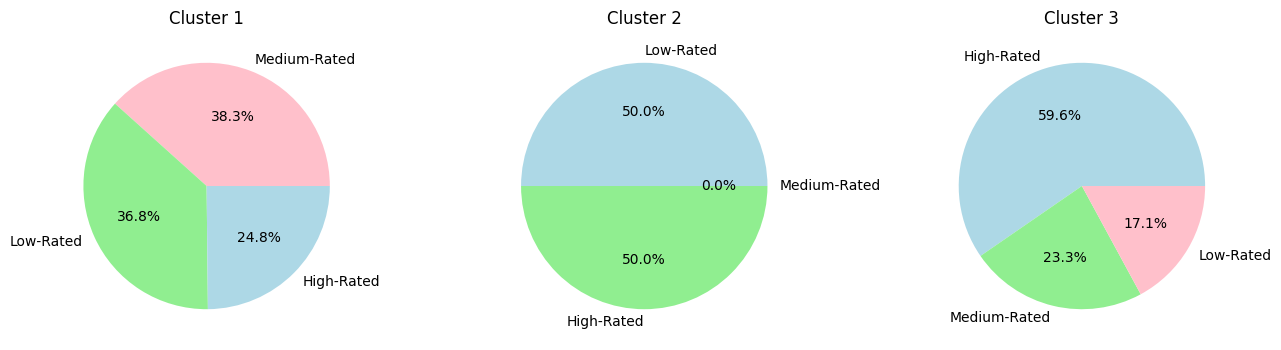

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

titles0 = titles[model.labels_== 0]
titles1 = titles[model.labels_== 1]
titles2 = titles[model.labels_== 2]

attribute_counts = titles0['imdb_score_bin'].value_counts()

# Extract attribute labels and their frequencies
labels = attribute_counts.index.tolist()
frequencies = attribute_counts.values.tolist()
colors = ['pink', 'lightgreen', 'lightblue']  # Specify colors for each label


axs[0].pie(frequencies, labels=labels, autopct='%1.1f%%', colors=colors)
axs[0].set_title("Cluster 1")


# Extract attribute labels and their frequencies
attribute_counts = titles1['imdb_score_bin'].value_counts()
labels = attribute_counts.index.tolist()
frequencies = attribute_counts.values.tolist()
colors = ['lightblue', 'lightgreen', 'pink']  # Specify colors for each label


axs[1].pie(frequencies, labels=labels, autopct='%1.1f%%', colors=colors)
axs[1].set_title("Cluster 2")

attribute_counts = titles2['imdb_score_bin'].value_counts()

# Extract attribute labels and their frequencies
labels = attribute_counts.index.tolist()
frequencies = attribute_counts.values.tolist()
colors = ['lightblue', 'lightgreen', 'pink']  # Specify colors for each label

axs[2].pie(frequencies, labels=labels, autopct='%1.1f%%', colors=colors)
axs[2].set_title("Cluster 3")

In [22]:
titles[model.labels_ == 1].head()

,id,title,type,description,release_year,runtime,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,genre,imdb_score_bin,encoded_type,encoded_genre
565,ts10264,60 Minutes,SHOW,America's popular television News magazine in ...,1968,47,['US'],45.0,tt0123338,7.4,3768.0,20.022,documentation,High-Rated,1,5
589,ts35764,The Young and the Restless,SHOW,"The rivalries, romances, hopes and fears of th...",1973,34,['US'],49.0,tt0069658,5.1,6197.0,74.760,drama,Low-Rated,1,6


This isn't much better either - only 2 instances in Cluster 2.
There could be 2 ways to fix this - either these are outliers (we hoped the first one would be the only one) and we should remove them, or we could change the linkage. 
We'll try with Complete Linkage.

Complete linkage (or maximum linkage): This method calculates the distance between two clusters as the maximum distance between any two points in the two clusters. It tends to form compact, spherical clusters and is less sensitive to outliers. Complete linkage is suitable when you expect well-separated, compact clusters in your data.

In [23]:
model = AgglomerativeClustering(n_clusters=3, linkage='complete', compute_distances=True)
model.fit(features)

AgglomerativeClustering(compute_distances=True, linkage='complete',
                        n_clusters=3)

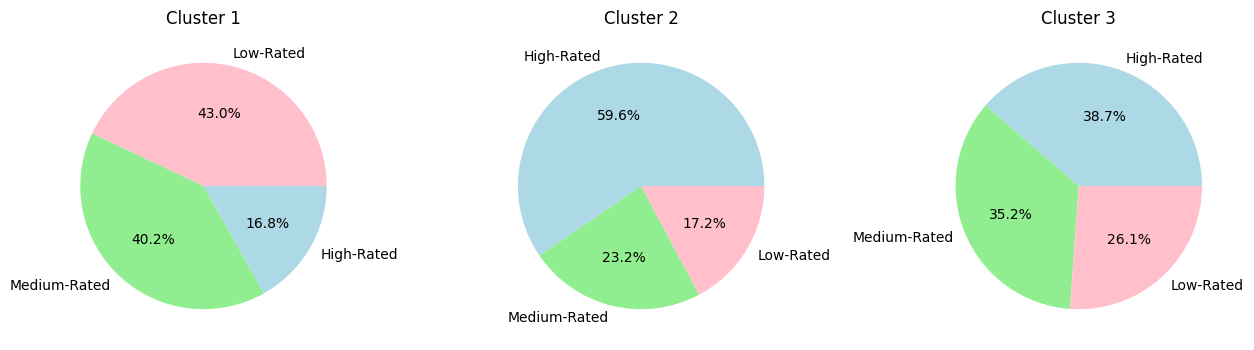

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

titles0 = titles[model.labels_== 0]
titles1 = titles[model.labels_== 1]
titles2 = titles[model.labels_== 2]

attribute_counts = titles0['imdb_score_bin'].value_counts()

# Extract attribute labels and their frequencies
labels = attribute_counts.index.tolist()
frequencies = attribute_counts.values.tolist()
colors = ['pink', 'lightgreen', 'lightblue']  # Specify colors for each label


axs[0].pie(frequencies, labels=labels, autopct='%1.1f%%', colors=colors)
axs[0].set_title("Cluster 1")


# Extract attribute labels and their frequencies
attribute_counts = titles1['imdb_score_bin'].value_counts()
labels = attribute_counts.index.tolist()
frequencies = attribute_counts.values.tolist()
colors = ['lightblue', 'lightgreen', 'pink']  # Specify colors for each label


axs[1].pie(frequencies, labels=labels, autopct='%1.1f%%', colors=colors)
axs[1].set_title("Cluster 2")

attribute_counts = titles2['imdb_score_bin'].value_counts()

# Extract attribute labels and their frequencies
labels = attribute_counts.index.tolist()
frequencies = attribute_counts.values.tolist()
colors = ['lightblue', 'lightgreen', 'pink']  # Specify colors for each label

axs[2].pie(frequencies, labels=labels, autopct='%1.1f%%', colors=colors)
axs[2].set_title("Cluster 3")

plt.savefig('aggl.png')

plt.show()

In [25]:
titles[model.labels_ == 1].shape

(564, 16)

This is a bit better. However, compared to the K_means algorithm that we did beforehand, it seems a bit weaker.
We'll analyze further in the comparison file.